# Ciencia de datos aplicada (ITBA): Modelo de segundo entregable

**Equipo:** Estudiante_1, Estudiante_2

**Nombre del proyecto**: Nombre definido para el proyecto en *Entregable 1*

### 🧾 1. Importación y carga de librerías

In [1]:
!pip install ucimlrepo

18.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 🧾 2. Carga de datos

En este caso utilizamos un dataset que aparece en el Repositorio UCI a modo de ejemplo.

In [3]:
from ucimlrepo import fetch_ucirepo

# Cargar el dataset de Wine Quality
wine_quality = fetch_ucirepo(id=186)

# wine_quality es un objeto con:
# - data.features: DataFrame con los features
# - data.targets: DataFrame con la variable objetivo
# - metadata: info del dataset
# - variables: descripciones de cada variable

# Combinar features y target en un solo DataFrame
df = wine_quality.data.features.copy()
df['quality'] = wine_quality.data.targets['quality']

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


La idea es que puedan aplicar técnicas de análisis y exploración a los datos escodigos para el Proyecto. Algunas de las técnicas pasibles de ser aplicadas se presentan a continuación.

### 🗒️ 2. Descripción del dataset
Este dataset contiene 13 variables sobre vinos tintos, incluyendo medidas físico-químicas y una evaluación sensorial de calidad.

**Variables numéricas:**
- fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide,
total sulfur dioxide, density, pH, sulphates, alcohol, quality.

**Variable objetivo:**
- quality (puntuación entre 0 y 10)

La variable quality podría ser representada como discreta a efectos de aplicar una técnica de clasificación.

### 🔍 3. Análisis exploratorio de datos (EDA)

In [5]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [6]:
# Información general
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
# Valores faltantes
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

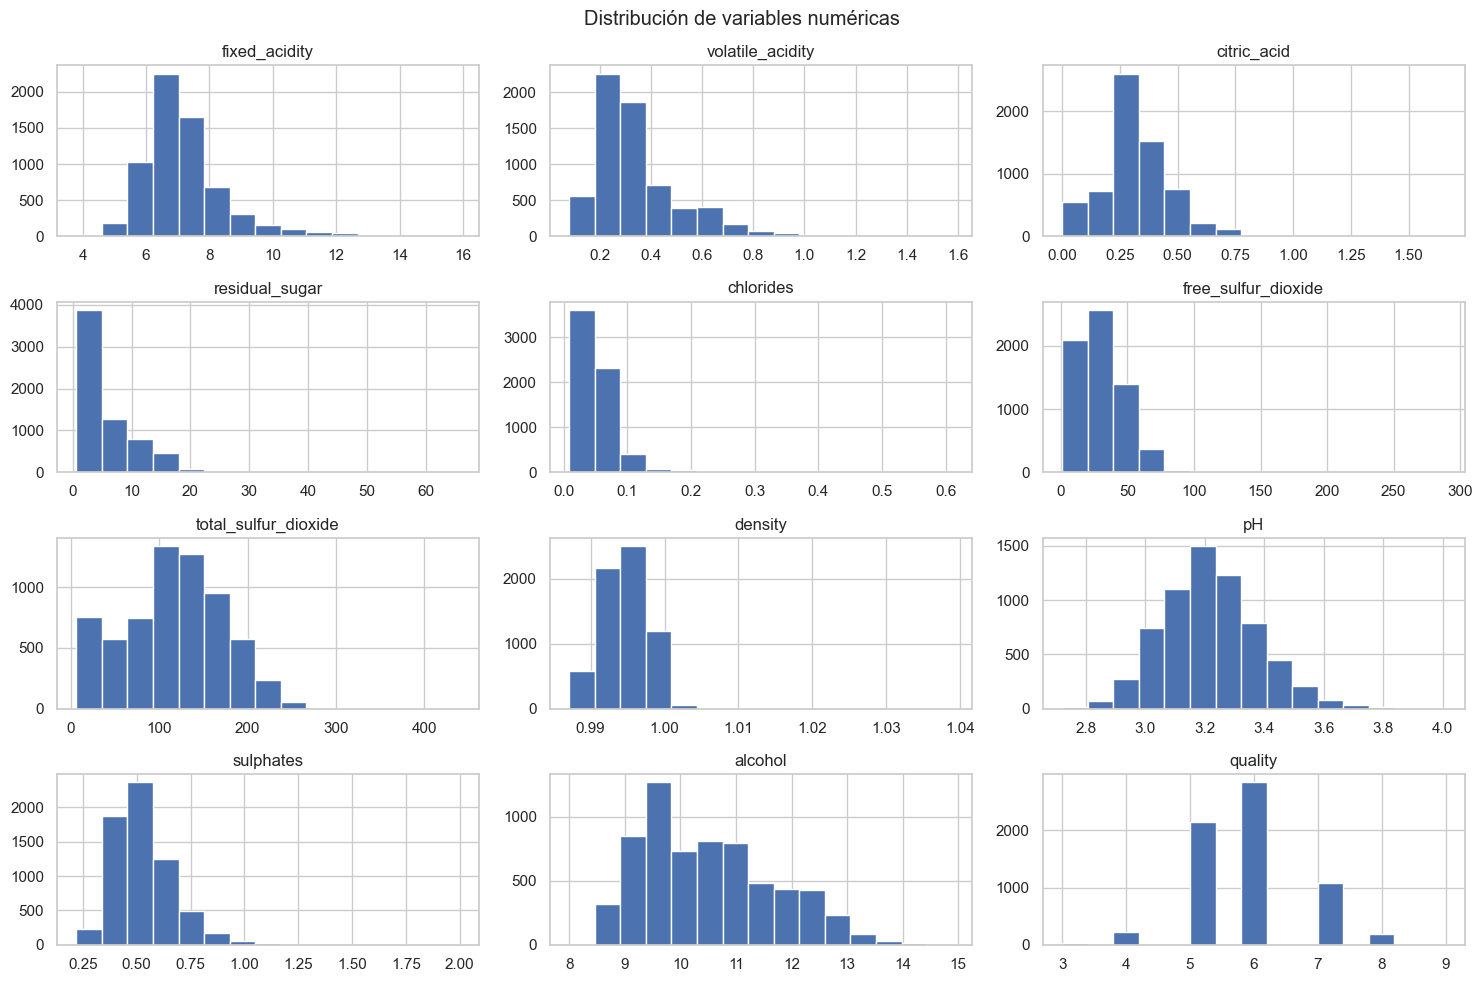

In [9]:
# Distribuciones de variables numéricas
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Distribución de variables numéricas')
plt.tight_layout()
plt.show()

#### 🧊 Detección de outliers con boxplots

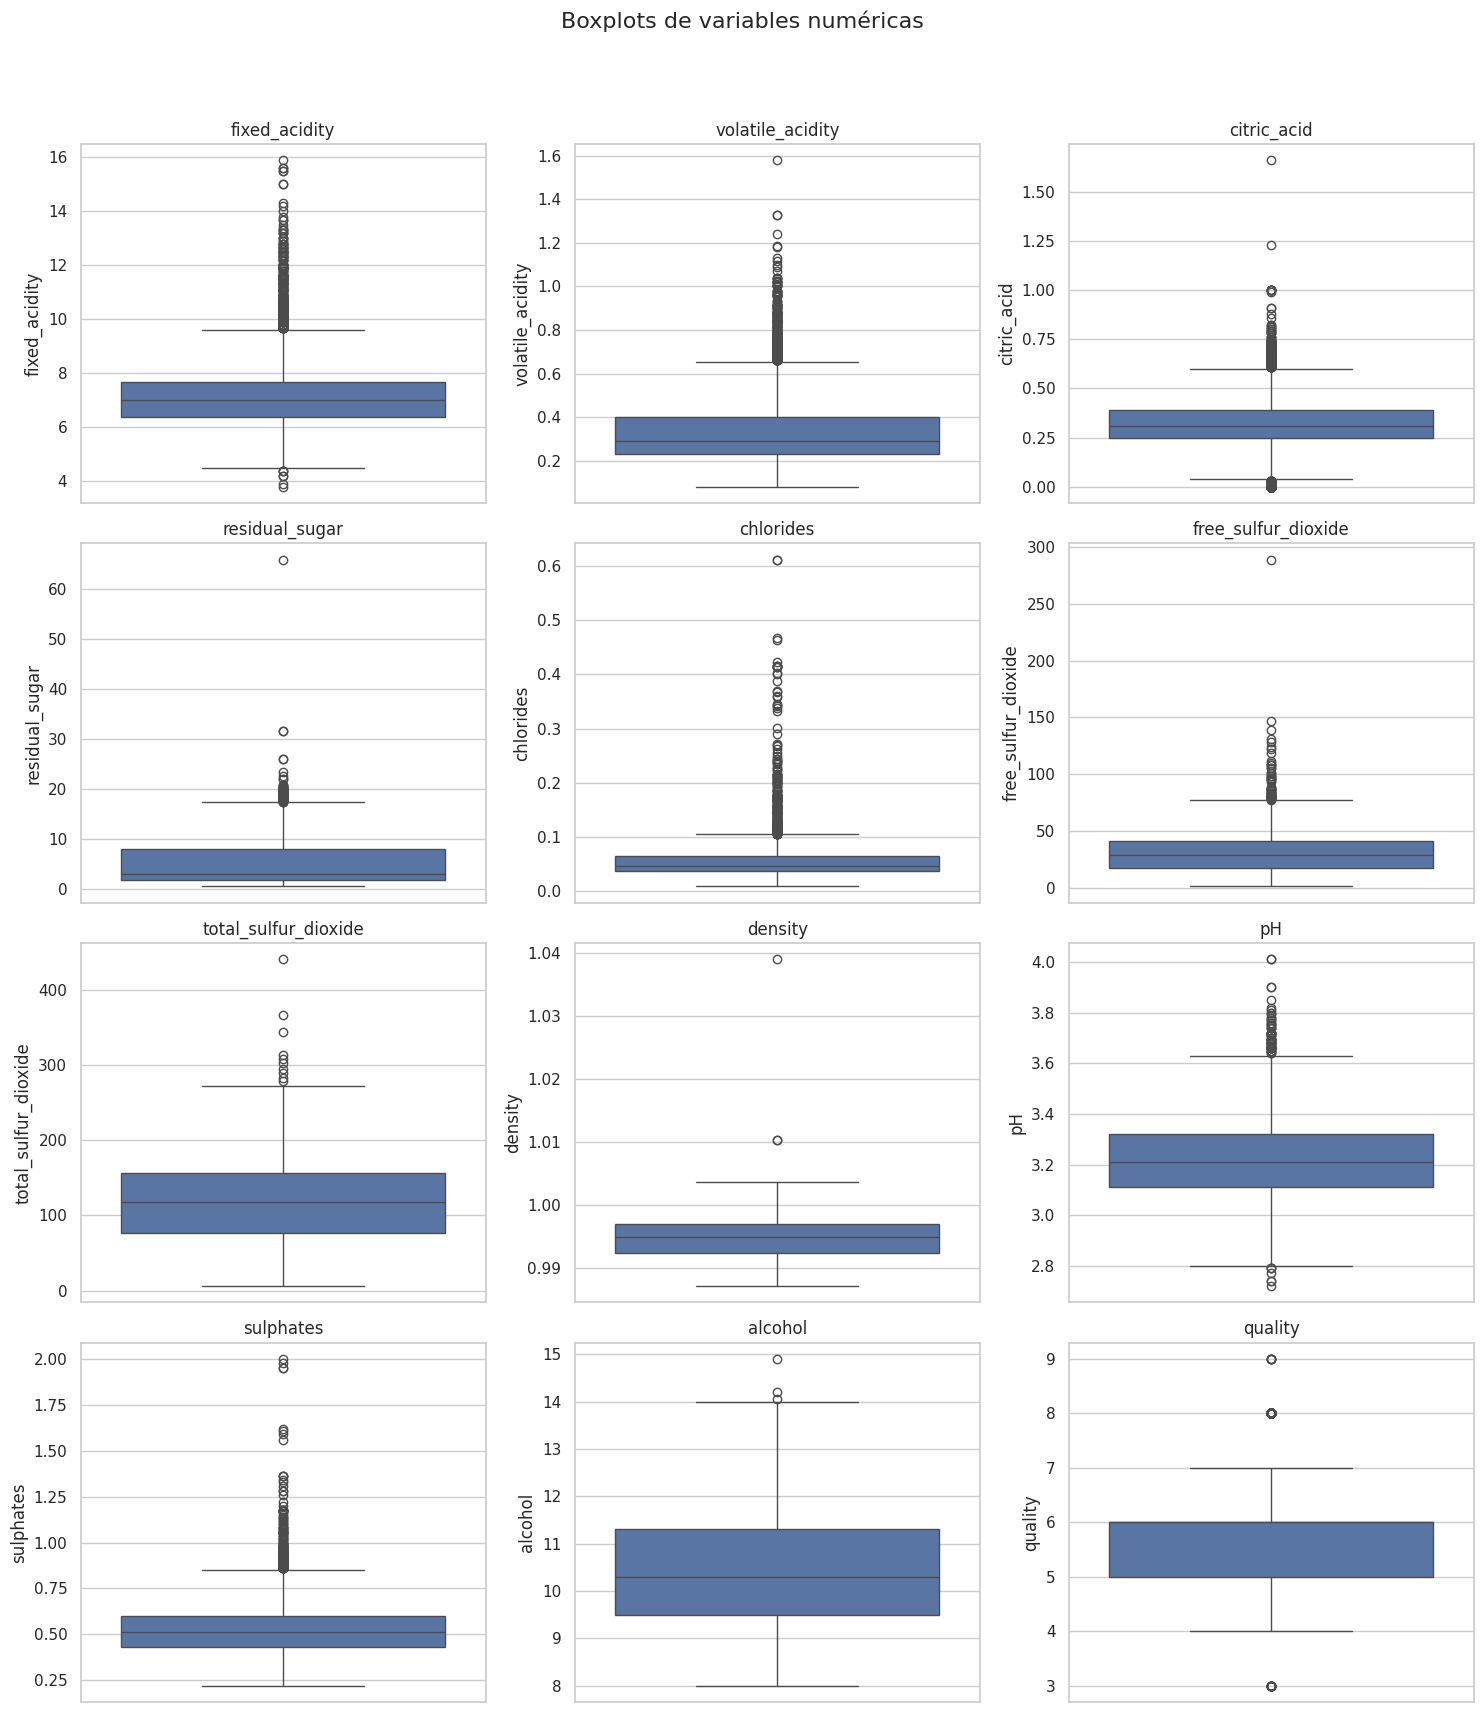

In [8]:
# Boxplots verticales de las 12 variables numéricas (3 por fila)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

columnas = df.select_dtypes(include='number').columns

for i, ax in enumerate(axes.flat):
    sns.boxplot(y=df[columnas[i]], ax=ax)
    ax.set_title(columnas[i])

plt.suptitle('Boxplots de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 🔗 Matriz de correlación entre variables numéricas

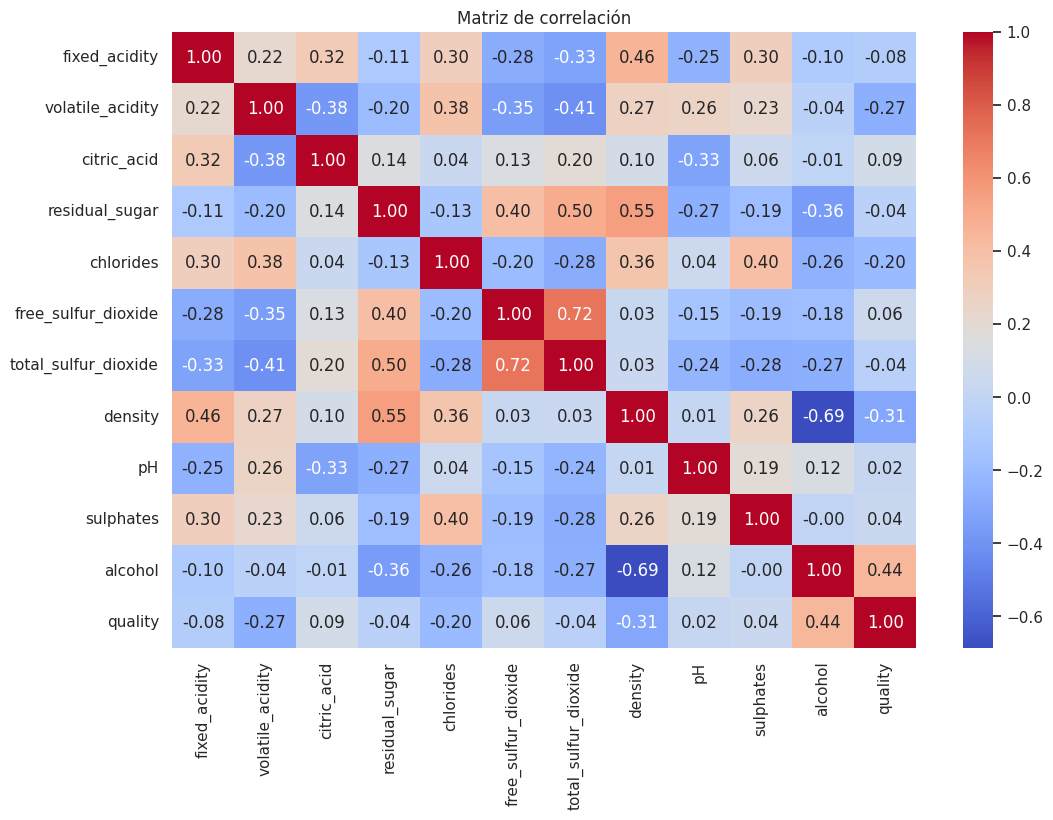

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

#### 📊 Relación entre variables: ejemplo alcohol vs quality

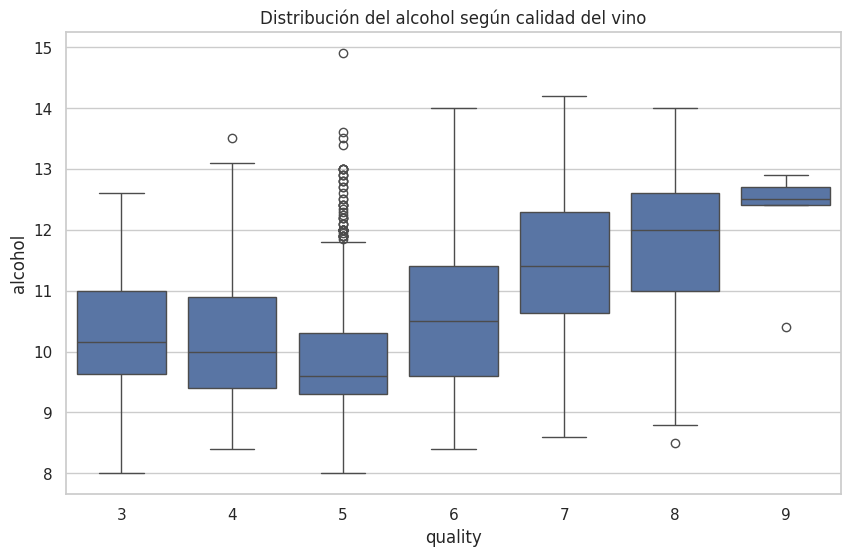

In [10]:
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Distribución del alcohol según calidad del vino')
plt.show()

### 🧼 4. Diagnóstico de calidad de datos
- No se detectaron valores faltantes.
- Algunas variables muestran asimetrías (ej: `residual sugar`, `chlorides`).
- Existen valores atípicos en varias variables.
- Se observa una posible relación positiva entre alcohol y calidad.

### 🧪 5. Transformaciones realizadas

In [11]:
# Crear variable categórica basada en calidad
df['quality_label'] = df['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')
df['quality_label'] = pd.Categorical(df['quality_label'], categories=['low', 'medium', 'high'])

In [12]:
# Normalización de variables numéricas (excepto quality)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include='number').columns.drop('quality')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [13]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,medium
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,medium
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,medium
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium


### ✍️ 6. Reflexión final
Este análisis exploratorio inicial permite entender la estructura y calidad del dataset. Las visualizaciones mostraron varias variables con outliers y diferentes distribuciones.La transformación de `quality` en una etiqueta categórica permitirá futuros análisis supervisados. La normalización garantiza que todas las variables numéricas estén en una misma escala.

Se invita a los estudiantes a ser **propositivos y analíticos**, justificando cada transformación o decisión. Las visualizaciones no deben ser decorativas, sino argumentos visuales que ayuden a entender los datos.